# About Dataset

## Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

## Content
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Collecting Data:
Let's load the dataframe stored in the parent folder downloaded from Kaggle.com.

In [2]:
df=pd.read_csv("german_credit_data.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Checking Acouunts:
1. A checking account is a deposit account with a bank or other financial firm that allows the holder to make deposits and withdrawals.
2. Checking accounts are very liquid, allowing for numerous deposits and withdrawals, as opposed to less liquid savings or investment accounts.

A checking account is a deposit account held at a financial institution that allows withdrawals and deposits. Also called demand accounts or transactional accounts, checking accounts are very liquid and can be accessed using checks, automated teller machines (ATMs), and electronic debits, among other methods. A checking account differs from other bank accounts in that it often allows for numerous withdrawals and unlimited deposits, whereas savings accounts sometimes limit both.

A checking account is beneficial for anyone who wants to make frequent withdrawals or transactions from a bank account. Setting up a checking account is generally very easy: You can apply online, or visit a bank branch, and get a checking account within an hour.(https://www.investopedia.com/terms/c/checkingaccount.asp)

Saving Account:

A savings account is an interest-bearing deposit account held at a bank or other financial institution. Though these accounts typically pay a modest interest rate, their safety and reliability make them a great option for parking cash you want available for short-term needs.

Savings accounts have some limitations on how often you can withdraw funds, but generally offer exceptional flexibility that’s ideal for building an emergency fund, saving for a short-term goal like buying a car or going on vacation, or simply sweeping surplus cash you don’t need in your checking account so it can earn more interest.(https://www.investopedia.com/terms/s/savingsaccount.asp#:~:text=A%20savings%20account%20is%20an,available%20for%20short%2Dterm%20needs.)

To understand numerical features of the dataset more.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


We can see different statistical quantities for the numerical features of the data frame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


There are a total of 1000 entries. There are a total of 10 features. The feature "Unnamed: 0" is just the 0 to 999. Which is just an index. We will drop this column later. We can see "Sex", "Housing", "Saving Accounts", "Checking account", "Purpose", and "Risk" are categorical features. The features called "Saving accounts", and "Checking account" have some null entries. We will try to deal with these later. The target feature is "Risk".



percent_missing=>
Unnamed: 0           0.0
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64


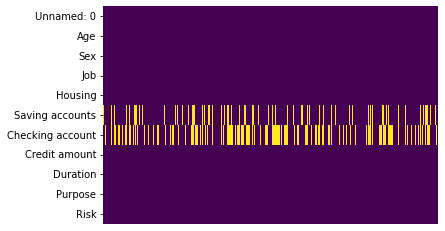

In [6]:
#Visualize null data
sns.heatmap(df.isnull().T,xticklabels=False,cbar=False,cmap='viridis')
percent_missing = df.isnull().sum() * 100 / len(df)
print("percent_missing=>")
print(percent_missing)

Here in the graph yelow strip is showing the null data. The Saving accounts feature is missing 18.3% and The checking account feature is 39.4% is missing.

In [7]:
#Drop the first column "Unnamed: 0" which is nothing but 0 to 999 index.
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
#Here we are converting Categorical data "Risk" to numerical data. Where the column will be good. For good that is 1 and for bad that will be zero. 
risk = pd.get_dummies(df['Risk'],drop_first=True)
df.drop(['Risk'],axis=1,inplace=True)
df= pd.concat([df, risk],axis=1)

In [9]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,good
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


# Splitting data to train and test

In [10]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [11]:
# All the columns of the datafram now
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'good'],
      dtype='object')

In [12]:
# Choose target varible as y and all other variable in X
X = df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose']]
y = df['good']

In [13]:
# Train, test split with 80% train and 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preparing Data:

Dealing with Categorical data and missing data.

In [14]:
#Change categorical data "Sex" and "Housing" to numerical
sex = pd.get_dummies(X_train['Sex'],drop_first=True)
housing = pd.get_dummies(X_train['Housing'],drop_first=True)
X_train.drop(['Sex','Housing'],axis=1,inplace=True)
X_train = pd.concat([X_train,sex,housing],axis=1)

In [15]:
X_train.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Purpose,male,own,rent
29,63,2,little,little,6836,60,business,1,1,0
535,33,2,little,rich,2319,21,education,1,0,1
695,50,2,quite rich,NaN,1236,6,car,1,0,1
557,29,2,NaN,NaN,5003,21,car,0,1,0
836,21,2,NaN,NaN,886,12,radio/TV,0,1,0


Below to deal with missing data, I took all the null data from "Saving accounts" and "Checking account" and named them U1 and U2, respectively. Here in U1 and U2, U is for unknown. U1 and U2 will behave as one of the categories in that particular feature, respectively.



In [16]:
# Use NaN data as U1(unknown 1) and U2 (unknown 2) for Saving accounts and Checking account respectively
SA=X_train["Saving accounts"].fillna("U1")
CA=X_train["Checking account"].fillna("U2")
X_train.drop(["Saving accounts","Checking account"],axis=1,inplace=True)
X_train = pd.concat([X_train,SA,CA],axis=1)

In [17]:
#Change categorical data 'Saving accounts', 'Checking account', 'Purpose' and "Risk" to numerical
saving_account = pd.get_dummies(X_train['Saving accounts'],drop_first=True)
checking_account = pd.get_dummies(X_train['Checking account'],drop_first=True)
purpose = pd.get_dummies(X_train['Purpose'],drop_first=True)
X_train.drop(['Saving accounts','Checking account',"Purpose"],axis=1,inplace=True)
X_train = pd.concat([X_train,saving_account,checking_account,purpose],axis=1)

In [18]:
# Train set where all the data in numerical
X_train.head()

,Age,Job,Credit amount,Duration,male,own,rent,little,moderate,quite rich,...,little,moderate,rich,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
29,63,2,6836,60,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
535,33,2,2319,21,1,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
695,50,2,1236,6,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
557,29,2,5003,21,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
836,21,2,886,12,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# All the features name
X_train.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'male', 'own', 'rent',
       'little', 'moderate', 'quite rich', 'rich', 'little', 'moderate',
       'rich', 'car', 'domestic appliances', 'education',
       'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'],
      dtype='object')

<AxesSubplot:xlabel='male', ylabel='count'>

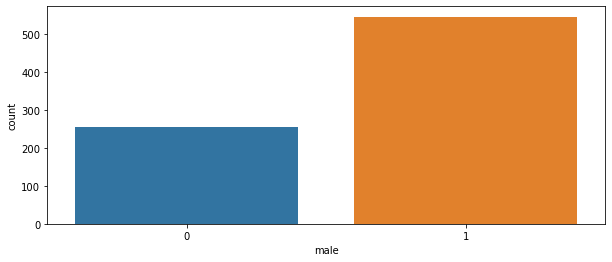

In [20]:
# Number of male and female. 
plt.figure(figsize=(10,4))
sns.countplot(x='male',data=X_train)

<AxesSubplot:xlabel='Job', ylabel='count'>

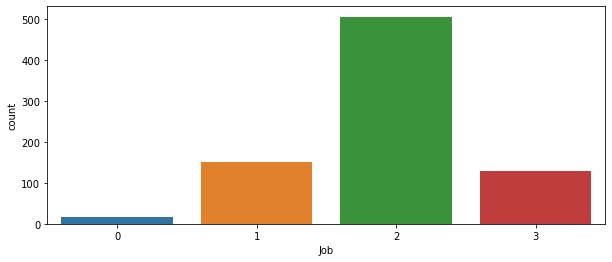

In [21]:
#Histogram for good, bad risk.
plt.figure(figsize=(10,4))
sns.countplot(x='Job',data=X_train)

In [22]:
#Correlation matrix after the whole data set in numerical form
matrix1=X_train.corr()
print(matrix1)

                          Age       Job  Credit amount  Duration      male  \
Age                  1.000000  0.025862       0.031826 -0.046792  0.170453   
Job                  0.025862  1.000000       0.281154  0.219076  0.062500   
Credit amount        0.031826  0.281154       1.000000  0.626410  0.089336   
Duration            -0.046792  0.219076       0.626410  1.000000  0.068983   
male                 0.170453  0.062500       0.089336  0.068983  1.000000   
own                 -0.009765 -0.075858      -0.131978 -0.062842  0.118697   
rent                -0.203143 -0.026161      -0.010639 -0.053055 -0.230034   
little              -0.062647  0.020152      -0.034007 -0.052395 -0.024619   
moderate            -0.079075  0.004664       0.022225  0.055956 -0.017397   
quite rich           0.031664 -0.045552      -0.066297 -0.033763  0.050307   
rich                 0.057621 -0.037904      -0.064551 -0.044620 -0.057578   
little              -0.041740 -0.021678      -0.035391  0.020981

<AxesSubplot:>

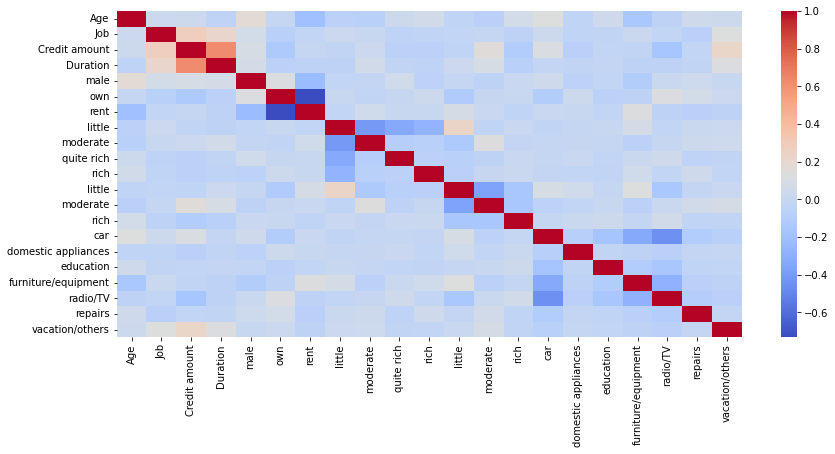

In [23]:
# Correlation matrix for train set features
plt.figure(figsize=(14,6))
sns.heatmap(matrix1,cmap='coolwarm')

<AxesSubplot:xlabel='Age', ylabel='count'>

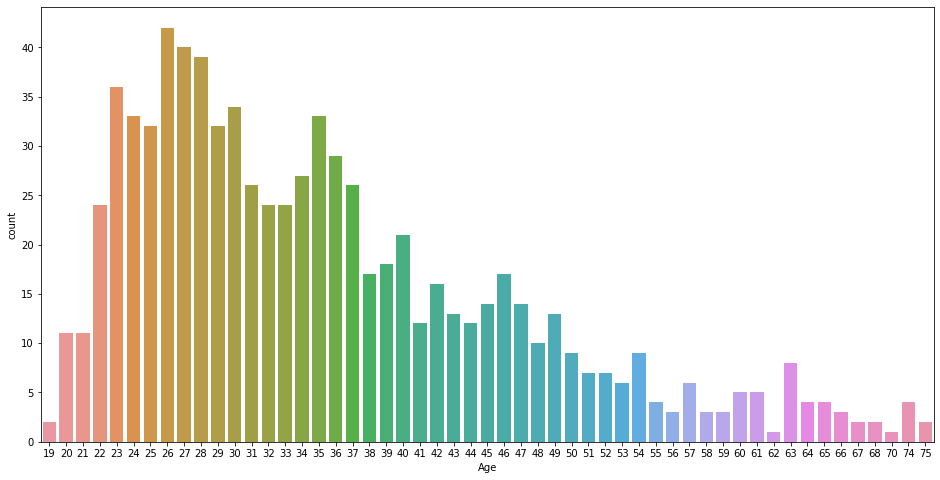

In [24]:
#Histogram for different ages of client
plt.figure(figsize=(16,8))
sns.countplot(x='Age',data=X_train)

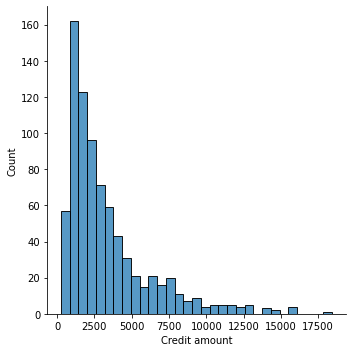

In [25]:
#Distribution of credit amount
sns.displot(X_train['Credit amount'])

# Classification using different Models

##  1. Logistic regression:


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/minhajul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
#Change categorical data "Sex" and "Housing" to numerical of test set
sex = pd.get_dummies(X_test['Sex'],drop_first=True)
housing = pd.get_dummies(X_test['Housing'],drop_first=True)
X_test.drop(['Sex','Housing'],axis=1,inplace=True)
X_test = pd.concat([X_test,sex,housing],axis=1)

In [29]:
# Use NaN data as U1(unknown 1) and U2 (unknown 2) for Saving accounts and Checking account respectively of test set
SA=X_test["Saving accounts"].fillna("U1")
CA=X_test["Checking account"].fillna("U2")
X_test.drop(["Saving accounts","Checking account"],axis=1,inplace=True)
X_test = pd.concat([X_test,SA,CA],axis=1)

In [30]:
#Change categorical data 'Saving accounts', 'Checking account', 'Purpose' and "Risk" to numerical test set
saving_account = pd.get_dummies(X_test['Saving accounts'],drop_first=True)
checking_account = pd.get_dummies(X_test['Checking account'],drop_first=True)
purpose = pd.get_dummies(X_test['Purpose'],drop_first=True)
X_test.drop(['Saving accounts','Checking account',"Purpose"],axis=1,inplace=True)
X_test = pd.concat([X_test,saving_account,checking_account,purpose],axis=1)

In [31]:
predictions = logmodel.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [33]:
print("classification_report:")
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print("confusion_matrix:")
print("\n")
print(confusion_matrix(y_test,predictions))

classification_report:


              precision    recall  f1-score   support

           0       0.61      0.34      0.43        59
           1       0.77      0.91      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.62      0.63       200
weighted avg       0.72      0.74      0.71       200



confusion_matrix:


[[ 20  39]
 [ 13 128]]


## 2. Random Forest Classifier:

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc_risk = RandomForestClassifier(n_estimators=100)
rfc_risk.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rfc_pred = rfc_risk.predict(X_test)

In [36]:
print("classification_report:")
print("\n")
print(classification_report(y_test,rfc_pred))
print("\n")
print("confusion_matrix:")
print("\n")
print("\n")
print(confusion_matrix(y_test,rfc_pred))

classification_report:


              precision    recall  f1-score   support

           0       0.66      0.36      0.46        59
           1       0.77      0.92      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.64      0.65       200
weighted avg       0.74      0.76      0.73       200



confusion_matrix:




[[ 21  38]
 [ 11 130]]


## 3. Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)

In [38]:
print("classification_report:")
print("\n")
print(classification_report(y_test,pred_dtree))
print("\n")
print("confusion_matrix:")
print("\n")
print("\n")
print(confusion_matrix(y_test,pred_dtree))

classification_report:


              precision    recall  f1-score   support

           0       0.47      0.49      0.48        59
           1       0.78      0.77      0.77       141

    accuracy                           0.69       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.69      0.69      0.69       200



confusion_matrix:




[[ 29  30]
 [ 33 108]]


## 4. Support vector classifier:

In [39]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
pred_svc= model.predict(X_test)

In [40]:
print("classification_report:")
print("\n")
print(classification_report(y_test,pred_svc))
print("\n")
print("confusion_matrix:")
print("\n")
print(confusion_matrix(y_test,pred_svc))

classification_report:


              precision    recall  f1-score   support

           0       0.75      0.05      0.10        59
           1       0.71      0.99      0.83       141

    accuracy                           0.71       200
   macro avg       0.73      0.52      0.46       200
weighted avg       0.72      0.71      0.61       200



confusion_matrix:


[[  3  56]
 [  1 140]]


Recall is very low.

## 5. Hyperparameter Tuning with GridSearchCV:

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,10000,100000], 'gamma': [1,0.1,0.01,0.001,0.0001,0.00001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.694 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.700 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.700 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.700 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.700 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.694 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.700 total time=   0.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.700 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.700 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.700 total time=   0.1s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.694 total time=   0.1s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END .................C=100, gamma=0.01;, score=0.644 total time=   0.1s
[CV 3/5] END .................C=100, gamma=0.01;, score=0.669 total time=   0.0s
[CV 4/5] END .................C=100, gamma=0.01;, score=0.613 total time=   0.1s
[CV 5/5] END .................C=100, gamma=0.01;, score=0.656 total time=   0.1s
[CV 1/5] END ................C=100, gamma=0.001;, score=0.581 total time=   0.1s
[CV 2/5] END ................C=100, gamma=0.001;, score=0.575 total time=   0.1s
[CV 3/5] END ................C=100, gamma=0.001;, score=0.650 total time=   0.1s
[CV 4/5] END ................C=100, gamma=0.001;, score=0.562 total time=   0.1s
[CV 5/5] END ................C=100, gamma=0.001;, score=0.594 total time=   0.1s
[CV 1/5] END ...............C=100, gamma=0.0001;, score=0.625 total time=   0.1s
[CV 2/5] END ...............C=100, gamma=0.0001;, score=0.594 total time=   0.1s
[CV 3/5] END ...............C=100, gamma=0.0001;, score=0.662 total time=   0.1s
[CV 4/5] END ...............

[CV 4/5] END ............C=100000, gamma=0.0001;, score=0.613 total time=   0.5s
[CV 5/5] END ............C=100000, gamma=0.0001;, score=0.644 total time=   0.6s
[CV 1/5] END .............C=100000, gamma=1e-05;, score=0.675 total time=   9.8s
[CV 2/5] END .............C=100000, gamma=1e-05;, score=0.644 total time=   6.9s
[CV 3/5] END .............C=100000, gamma=1e-05;, score=0.688 total time=  10.1s
[CV 4/5] END .............C=100000, gamma=1e-05;, score=0.637 total time=   7.7s
[CV 5/5] END .............C=100000, gamma=1e-05;, score=0.738 total time=  14.1s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=3)

In [42]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [43]:
grid_predictions = grid.predict(X_test)
print("classification_report:")
print("\n")
print(classification_report(y_test,grid_predictions))
print("\n")
print("confusion_matrix:")
print("\n")
print(confusion_matrix(y_test,grid_predictions))

classification_report:


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.70      1.00      0.83       141

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



confusion_matrix:


[[  0  59]
 [  0 141]]


/Users/minhajul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/minhajul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/minhajul/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6. Neural Network:

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

2023-02-18 10:23:52.575854: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
X_train.shape

(800, 21)

In [46]:
# Deep learning model with five hidden layer
model = Sequential()

model.add(Dense(units=21,activation='relu'))

model.add(Dense(units=54,activation='relu'))

model.add(Dense(units=25,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='nadam')

2023-02-18 10:24:05.265066: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=1000,verbose=1
          )

Epoch 1/1000
25/25 [==============================] - 3s 4ms/step - loss: 4.8339
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 3.3642
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 2.3671
Epoch 4/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.4383
Epoch 5/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.9399
Epoch 6/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4952
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5845
Epoch 8/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.7646
Epoch 9/1000
25/25 [==============================] - 0s 4ms/step - loss: 2.0220
Epoch 10/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2827
Epoch 11/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.9392
Epoch 12/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.5778
Epoch 13/1000
25/25 [====

25/25 [==============================] - 0s 4ms/step - loss: 0.7639
Epoch 102/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.8537
Epoch 103/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8018
Epoch 104/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7585
Epoch 105/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6800
Epoch 106/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.8721
Epoch 107/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7585
Epoch 108/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7529
Epoch 109/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6697
Epoch 110/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7735
Epoch 111/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.9687
Epoch 112/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7168
Epoch 113/1000
25/2

25/25 [==============================] - 0s 4ms/step - loss: 0.6304
Epoch 298/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5550
Epoch 299/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5666
Epoch 300/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5618
Epoch 301/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.5699
Epoch 302/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5488
Epoch 303/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5780
Epoch 304/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5566
Epoch 305/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5679
Epoch 306/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5486
Epoch 307/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.5648
Epoch 308/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5563
Epoch 309/1000
25/2

25/25 [==============================] - 0s 6ms/step - loss: 0.5206
Epoch 494/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.5135
Epoch 495/1000
25/25 [==============================] - 0s 12ms/step - loss: 0.5049
Epoch 496/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.5017
Epoch 497/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.5056
Epoch 498/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4981
Epoch 499/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5163
Epoch 500/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5504
Epoch 501/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5469
Epoch 502/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5442
Epoch 503/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.5306
Epoch 504/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5189
Epoch 505/1000
25/

25/25 [==============================] - 0s 6ms/step - loss: 0.6205
Epoch 690/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5779
Epoch 691/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.5392
Epoch 692/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5071
Epoch 693/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.5198
Epoch 694/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5336
Epoch 695/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.5279
Epoch 696/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5120
Epoch 697/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.5028
Epoch 698/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.5079
Epoch 699/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5065
Epoch 700/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.5144
Epoch 701/1000
25/2

25/25 [==============================] - 0s 5ms/step - loss: 0.4694
Epoch 886/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4627
Epoch 887/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4759
Epoch 888/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.4617
Epoch 889/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4631
Epoch 890/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4718
Epoch 891/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4777
Epoch 892/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4703
Epoch 893/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4677
Epoch 894/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4532
Epoch 895/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4869
Epoch 896/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4652
Epoch 897/1000
25/2

In [48]:
predictions_deep = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [49]:
pred_deep=[]
m=len(predictions_deep)
for i in range(m):
    if predictions_deep[i]<0.5:
        pred_deep.append(0)
    else:
        pred_deep.append(1)

In [50]:
print("classification_report:")
print("\n")
print(classification_report(y_test,pred_deep))
print("\n")
print("confusion_matrix:")
print("\n")
print(confusion_matrix(y_test,pred_deep))

classification_report:


              precision    recall  f1-score   support

           0       0.75      0.25      0.38        59
           1       0.76      0.96      0.85       141

    accuracy                           0.76       200
   macro avg       0.75      0.61      0.61       200
weighted avg       0.75      0.76      0.71       200



confusion_matrix:


[[ 15  44]
 [  5 136]]


In [51]:
from sklearn.metrics import precision_recall_curve

In [52]:
precisions, recalls, thresholds = precision_recall_curve(y_test, predictions_deep)

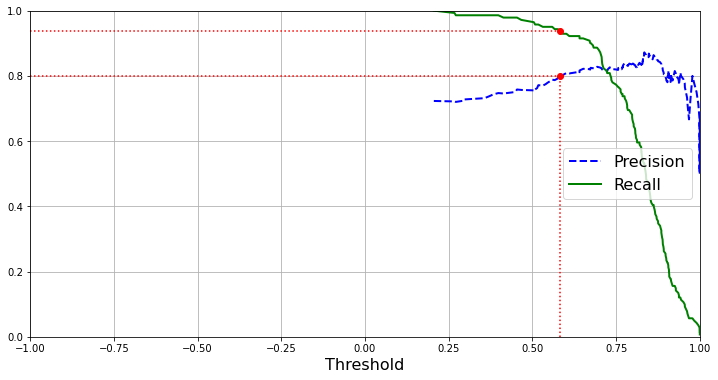

In [53]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)       
    plt.grid(True)                              
    plt.axis([-1, 1, 0, 1])            



recall_80_precision = recalls[np.argmax(precisions >= 0.80)]
threshold_80_precision = thresholds[np.argmax(precisions >= 0.80)]


plt.figure(figsize=(12, 6))                                                                 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_80_precision, threshold_80_precision], [0., 0.8], "r:")                 
plt.plot([-1, threshold_80_precision], [0.8, 0.8], "r:")                                
plt.plot([-1, threshold_80_precision], [recall_80_precision, recall_80_precision], "r:")
plt.plot([threshold_80_precision], [0.8], "ro")                                             
plt.plot([threshold_80_precision], [recall_80_precision], "ro")                             
plt.show()

In [54]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test, predictions_deep)

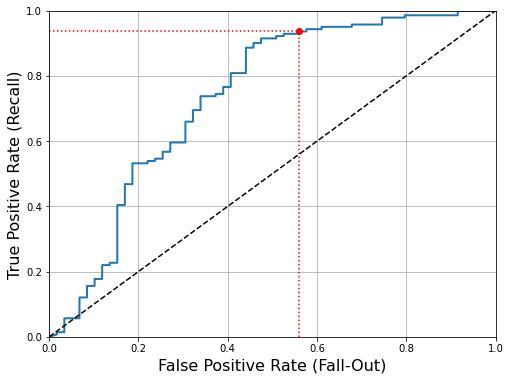

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)
                                                
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_80 = fpr[np.argmax(tpr >= recall_80_precision)]           
plt.plot([fpr_80, fpr_80], [0., recall_80_precision], "r:")   
plt.plot([0.0, fpr_80], [recall_80_precision, recall_80_precision], "r:")  
plt.plot([fpr_80], [recall_80_precision], "ro")               
plt.show()

In [56]:
# Area under the roc curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predictions_deep)

0.7365668950595022

# Conclusion:
 1. Best method is the deep learning method with TensorFlow using Nadam optimizer with 76% accuracy.
 2. we can improve the model by getting a model without null data.
 3. Maybe we can deal with null data in another effective way.
 4. There is some good statistical technique and quantity we can go through, like Weight of evidence, probability          of default (PD), loss given default (LGD), exposure at default (EAD), and expected loss (EL) and improve the          model. These things I am learning and still are not clear to me. I will try to implement these in the future. 